<a href="https://colab.research.google.com/github/SalimZ04/UAV_MCV/blob/main/MOEAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYMOO** est une bibliothèque Python pour la résolution de problèmes d'optimisation multi-objectif. Elle implémente divers algorithmes d'optimisation multi-objectifs avec une interface simple et facile à utiliser. Pymoo est open source et est régulièrement mis à jour avec de nouvelles fonctionnalités et améliorations.

In [ ]:
pip install -U pymoo

In [2]:
pip install --pre -U pymoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

Multi-objective: solution perato  problem

    :ZDT1
    :ZDT2
    :ZDT3
    :ZDT4
    :ZDT6

In [4]:
problem = get_problem("dtlz2") # Returns a 3-tuple with the objective function

ref_dirs = get_reference_directions("uniform", 3, n_partitions=12)


In [5]:
algorithm = MOEAD(
    ref_dirs, #faire la distance entre points
    n_neighbors=12, # voisins des points
    prob_neighbor_mating=0.7,  #des points couples
)

In [11]:
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1, #minimiser
               verbose=False)

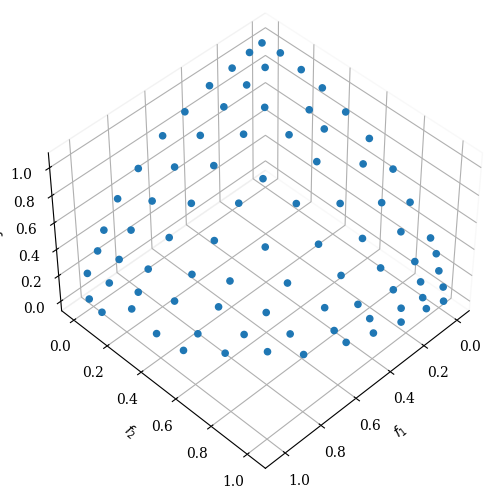

In [12]:
Scatter().add(res.F).show()


In [ ]:
#plot = Scatter()
#plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
#plot.add(res.F, color="red")
#plot.show()

Multi-layer:
*Cette approche utilise l'idée de mettre à l'échelle différents simplexes. Cela nécessite que l'utilisateur définisse différentes couches, y compris la dimensionnalité n_dim, le numéro de partition n_partitions et la mise à l'échelle correspondante. Par exemple, pour trois dimensions, un biais vers le centre peut être obtenu comme suit :*

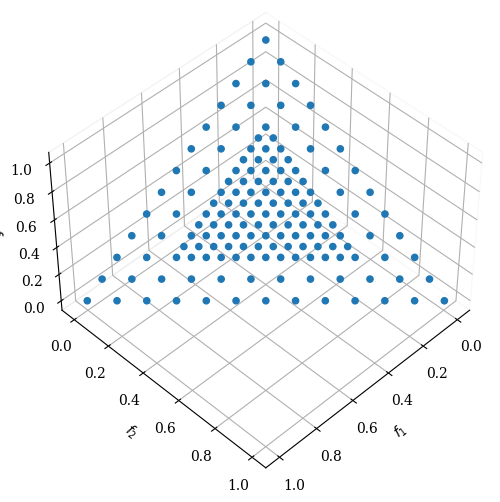

In [19]:
ref_dirs = get_reference_directions(
    "multi-layer",
    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=1.0),
    get_reference_directions("das-dennis", 3, n_partitions=12, scaling=0.5)
)

Scatter().add(ref_dirs).show()

In [23]:
#plot = Scatter()
#plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.2)
#plot.add(ref_dirs, color="red")
#plot.show()

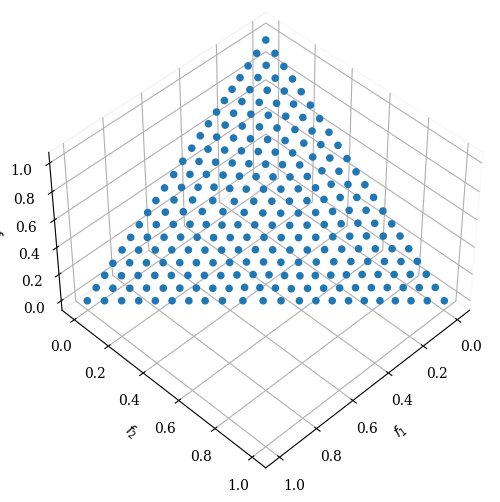

In [20]:
ref_dirs = get_reference_directions("energy", 3, 250, seed=1)
Scatter().add(ref_dirs).show()



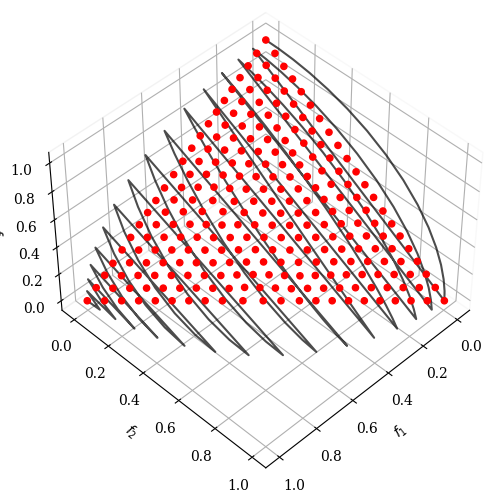

In [21]:
#plot = Scatter()
#plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
#plot.add(ref_dirs, color="red")
#plot.show()

das dennis

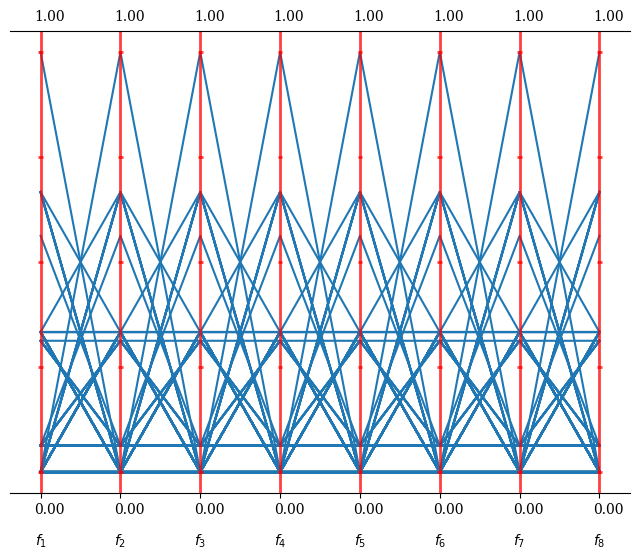

In [ ]:
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.pcp import PCP

ref_dirs = get_reference_directions(
    "multi-layer",
    get_reference_directions("das-dennis", 8, n_partitions=3, scaling=1.0),
    get_reference_directions("das-dennis", 8, n_partitions=2, scaling=0.5),
)

PCP().add(ref_dirs).show()

Riesz s-Energy 

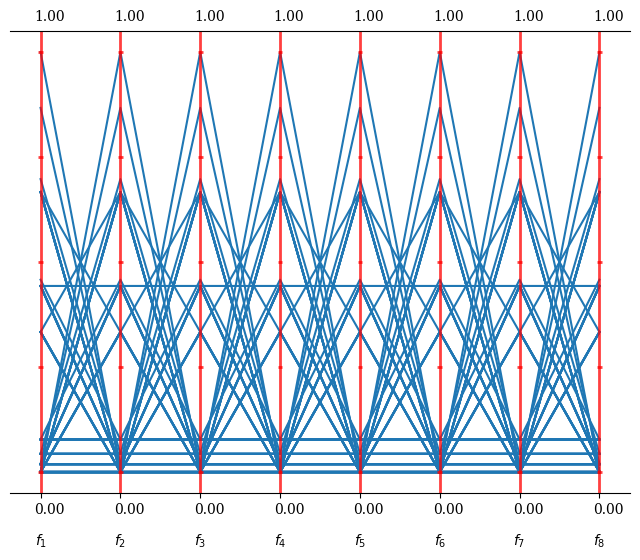

In [ ]:
partitions = [3, 2, 1, 1]

ref_dirs = get_reference_directions("layer-energy", 8, partitions)
PCP().add(ref_dirs).show()

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=True)
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()

MOEA Par Decomposition

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pymoo.util.misc import all_combinations

# number of points to be used for plotting
n_points = 100

# the xlim
P = np.linspace(0, 3, n_points)

# used for the meshgrid
X = all_combinations(P,P)

Plot_contour : est une technique graphique permettant de représenter une surface tridimensionnelle en traçant des tranches z constantes, appelées contours, sur un format bidimensionnel. C'est-à-dire que, étant donné une valeur pour z, des lignes sont tracées pour relier les coordonnées (x, y) où cette valeur z se produit.



In [ ]:
def plot_contour(X, F):
    _X = X[:, 0].reshape((n_points,n_points))
    _Y = X[:, 1].reshape((n_points,n_points))
    _Z = F.reshape((n_points,n_points))

    fig, ax = plt.subplots()
    ax.contour(_X,_Y, _Z, colors='black')
    ax.arrow(0, 0, 2.5, 2.5, color='blue', head_width=0.1, head_length=0.1, alpha=0.4)
    ax.set_aspect('equal')

Et ensuite définir les poids à utiliser par les fonctions de décomposition :

In [ ]:
weights = [0.5, 0.5]

Somme du  Poids 

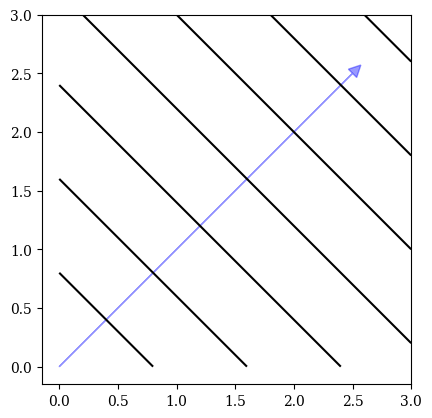

In [ ]:
from pymoo.decomposition.weighted_sum import WeightedSum

dm = WeightedSum()
# X = all_combinations(P,P)
# plot_contour(X, F)
plot_contour(X, dm(X, weights=weights))

PBI

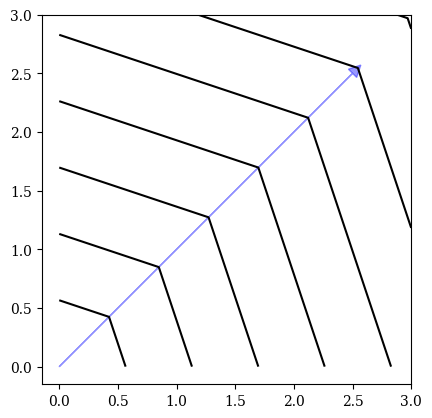

In [ ]:
from pymoo.decomposition.pbi import PBI

dm = PBI(eps=0.0, theta=0.5)

plot_contour(X, dm(X, weights=weights))

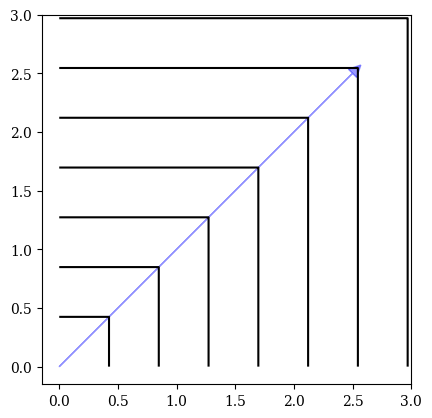

In [ ]:
dm = PBI(eps=0.0, theta=1.0)
plot_contour(X, dm(X, weights=weights))

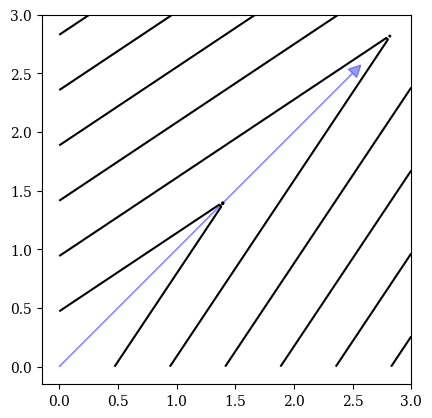

In [ ]:
dm = PBI(eps=0.0, theta=5.0)
plot_contour(X, dm(X, weights=weights))